### HealthCare Diabetes Prediction

Understanding the problem statement

1) Problem Statement

This project aims to assess and predict the likelihood of diabetes in individuals by analyzing key health indicators and lifestyle factors. It investigates how attributes like gender, age, hypertension, heart disease, smoking history, BMI, HbA1c levels, and blood glucose levels contribute to diabetes risk. By exploring these variables, the project seeks to identify patterns and correlations that can enhance early diagnosis, support preventive healthcare, and improve patient outcomes through data-driven insights into diabetes prediction.

2) Data Collection



In [45]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
df = pd.read_csv('data/diabetes.csv')

In [47]:
df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,27.32,6.1,80,0
96,Female,67.0,0,0,never,27.32,6.2,159,1
97,Male,11.0,0,0,No Info,27.32,6.1,90,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


In [48]:
df.shape

(100000, 9)

In [49]:
#Check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [50]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [52]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [53]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [54]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [55]:
print(f"Categories in gender variable : {df['gender'].unique()}")
print(f"Categories in hypertension variable : {df['hypertension'].unique()}")
print(f"Categories in heart disease variable : {df['heart_disease'].unique()}")
print(f"Categories in smoking history variable : {df['smoking_history'].unique()}")
print(f"Categories in diabetes variable : {df['diabetes'].unique()}")

Categories in gender variable : ['Female' 'Male' 'Other']
Categories in hypertension variable : [0 1]
Categories in heart disease variable : [1 0]
Categories in smoking history variable : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Categories in diabetes variable : [0 1]


In [56]:
# Step 1: Identify all object type columns as categorical features
cat_features = list(df.select_dtypes(include='object').columns)

# Step 2: Identify integer columns with few unique values as categorical features (e.g., binary or coded categories)
cat_features += [col for col in df.select_dtypes(include='int64').columns if df[col].nunique() <= 10]

# Step 3: Remaining columns with numeric types (float or int with many unique values) are treated as numerical features
num_features = [col for col in df.columns if col not in cat_features]

# Display the results
print(f"Categorical Features: {cat_features}")
print(f"Numerical Features: {num_features}")

Categorical Features: ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']
Numerical Features: ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


### Exploring Data (Visulization)

##### 4.1 Visualization for Smoking history for certain age for gender


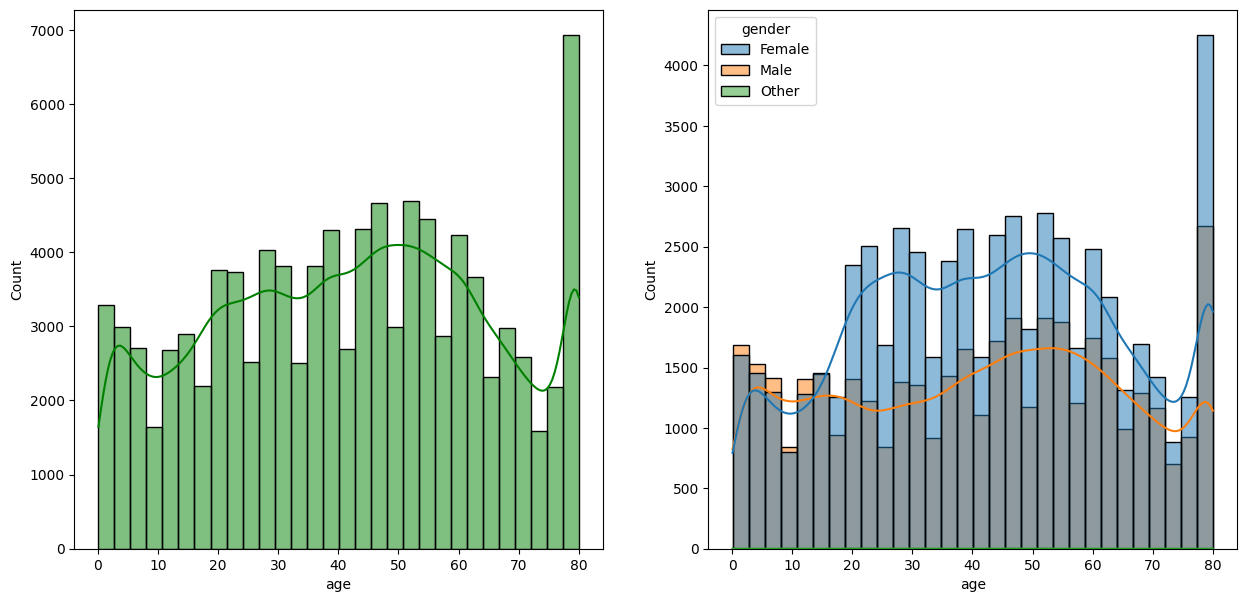

In [57]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(data = df, x= 'age',bins = 30, kde = True, color  = 'g')
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'age', kde = True, hue = 'gender',bins = 30)
plt.show()

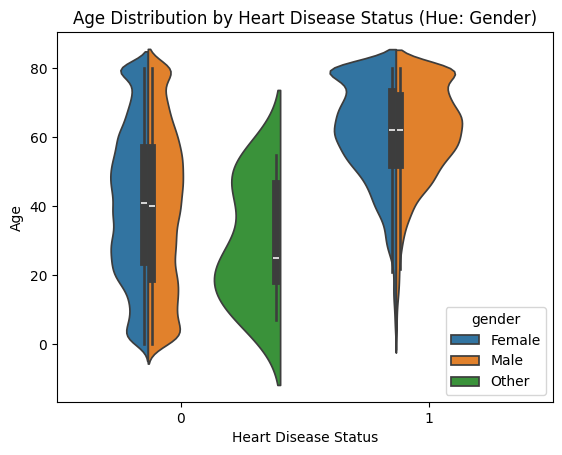

In [70]:
sns.violinplot(data=df, x='diabetes', y='age', hue='gender', split=True)
plt.title("Age Distribution by Heart Disease Status (Hue: Gender)")
plt.xlabel("Heart Disease Status")
plt.ylabel("Age")
plt.show()

- Individuals with heart disease tend to be older than those without heart disease.
- There is a noticeable difference in the spread of ages for males and females with heart disease, with males showing a slightly broader range of ages.


#### 4. BMI vs. Hypertension with Hue for Gender or Heart Disease


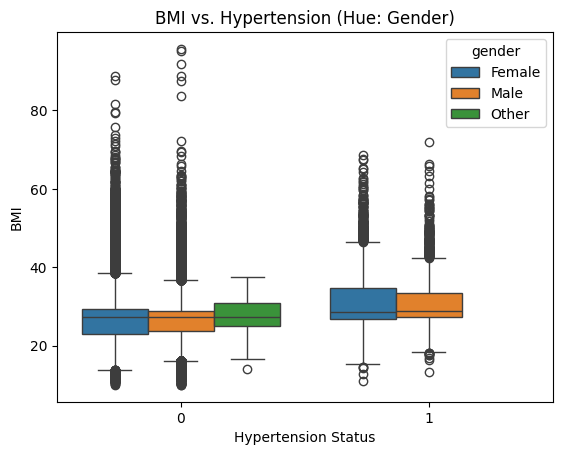

In [61]:
sns.boxplot(data=df, y='bmi', x='hypertension', hue='gender')
plt.title("BMI vs. Hypertension (Hue: Gender)")
plt.xlabel("Hypertension Status")
plt.ylabel("BMI")
plt.show()

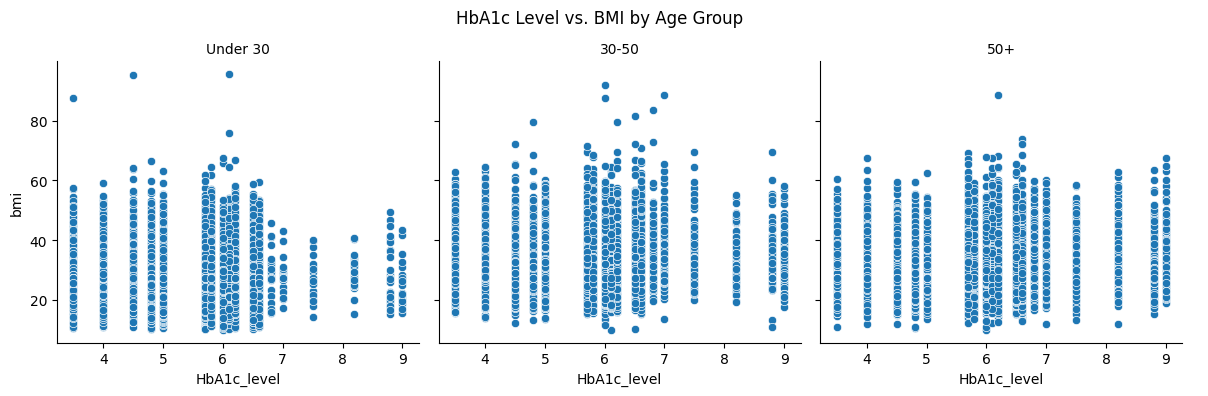

In [65]:
# Define age groups
bins = [0, 30, 50, 80]  # Adjust bins as necessary
labels = ['Under 30', '30-50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

g = sns.FacetGrid(df, col='age_group', height=4, aspect=1)
g.map(sns.scatterplot, 'HbA1c_level', 'bmi')
g.add_legend()
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('HbA1c Level vs. BMI by Age Group')
plt.show()


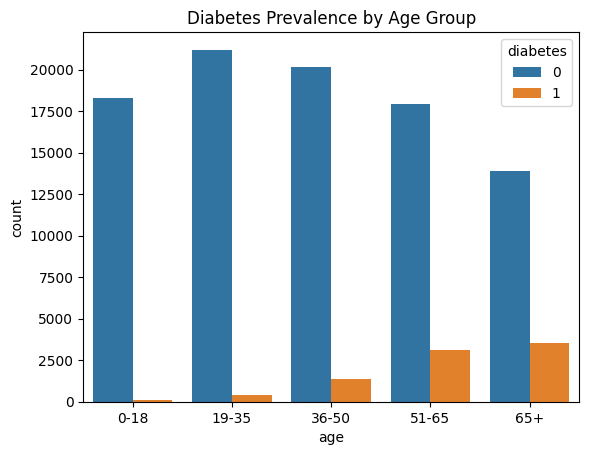

In [66]:
age_bins = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
sns.countplot(x=age_bins, hue='diabetes', data=df)
plt.title("Diabetes Prevalence by Age Group")
plt.show()


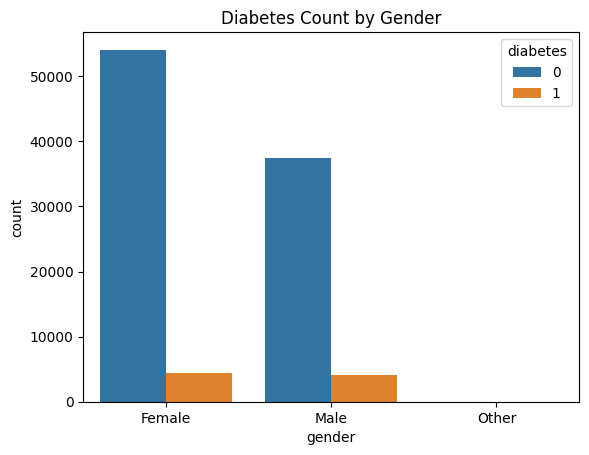

In [67]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title("Diabetes Count by Gender")
plt.show()

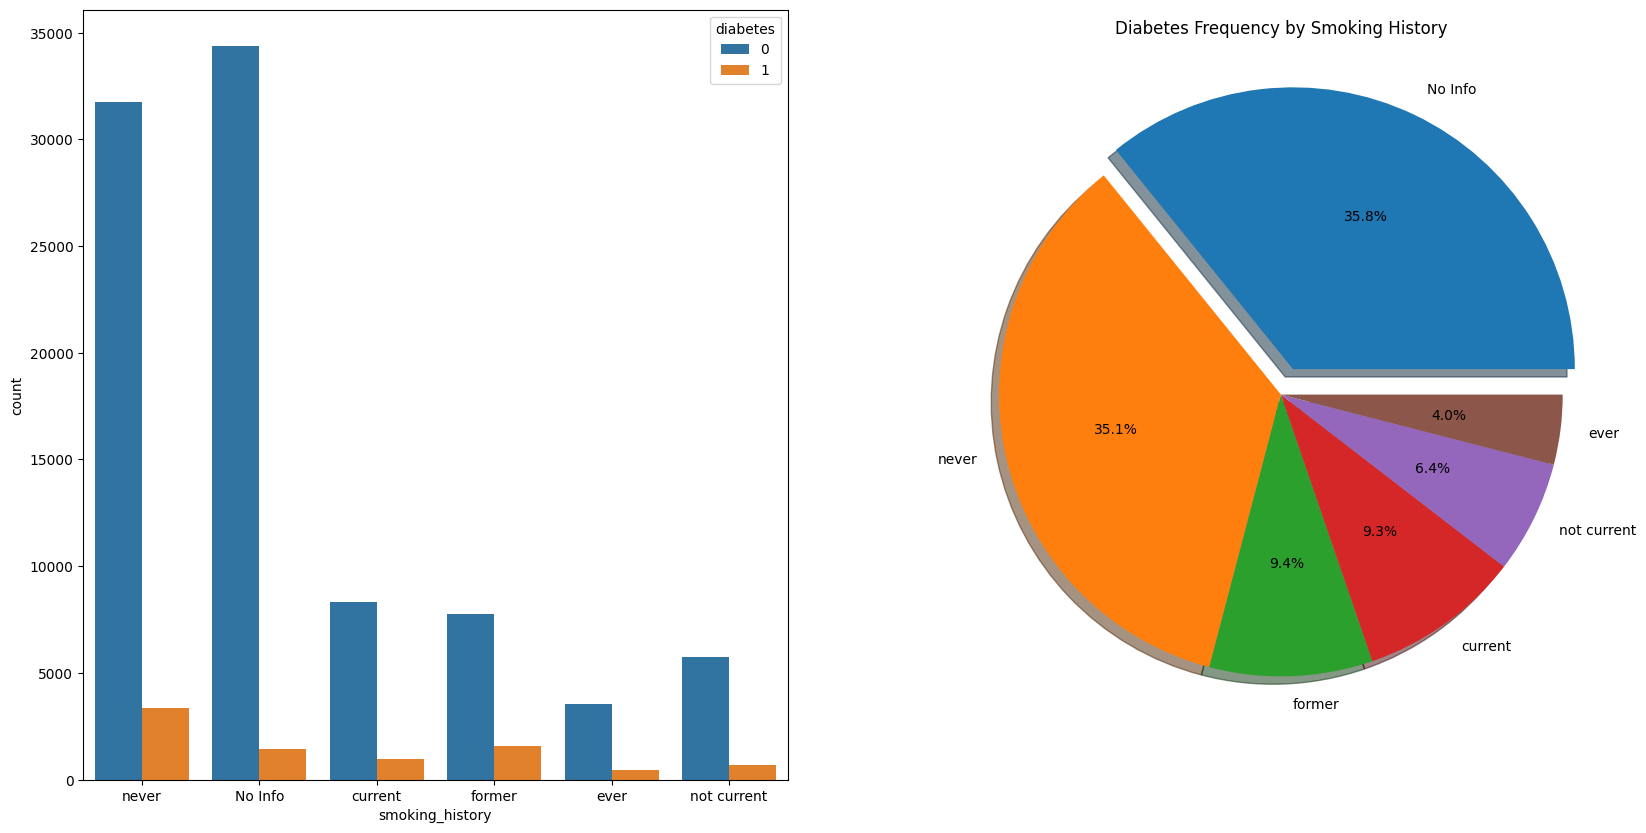

In [74]:
f, ax  = plt.subplots(1,2, figsize = (20,10))
sns.countplot(data=df, x='smoking_history',ax=ax[0], hue='diabetes')
plt.title("Diabetes Frequency by Smoking History")
plt.xticks(rotation=45)
plt.pie(x= df['smoking_history'].value_counts(), labels = df['smoking_history'].value_counts().index,explode=[0.1,0,0,0,0,0], autopct='%1.1f%%',shadow=True  )
plt.show()





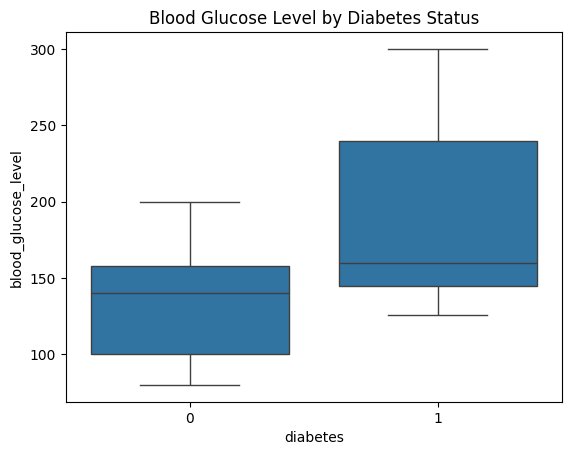

In [69]:
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title("Blood Glucose Level by Diabetes Status")
plt.show()


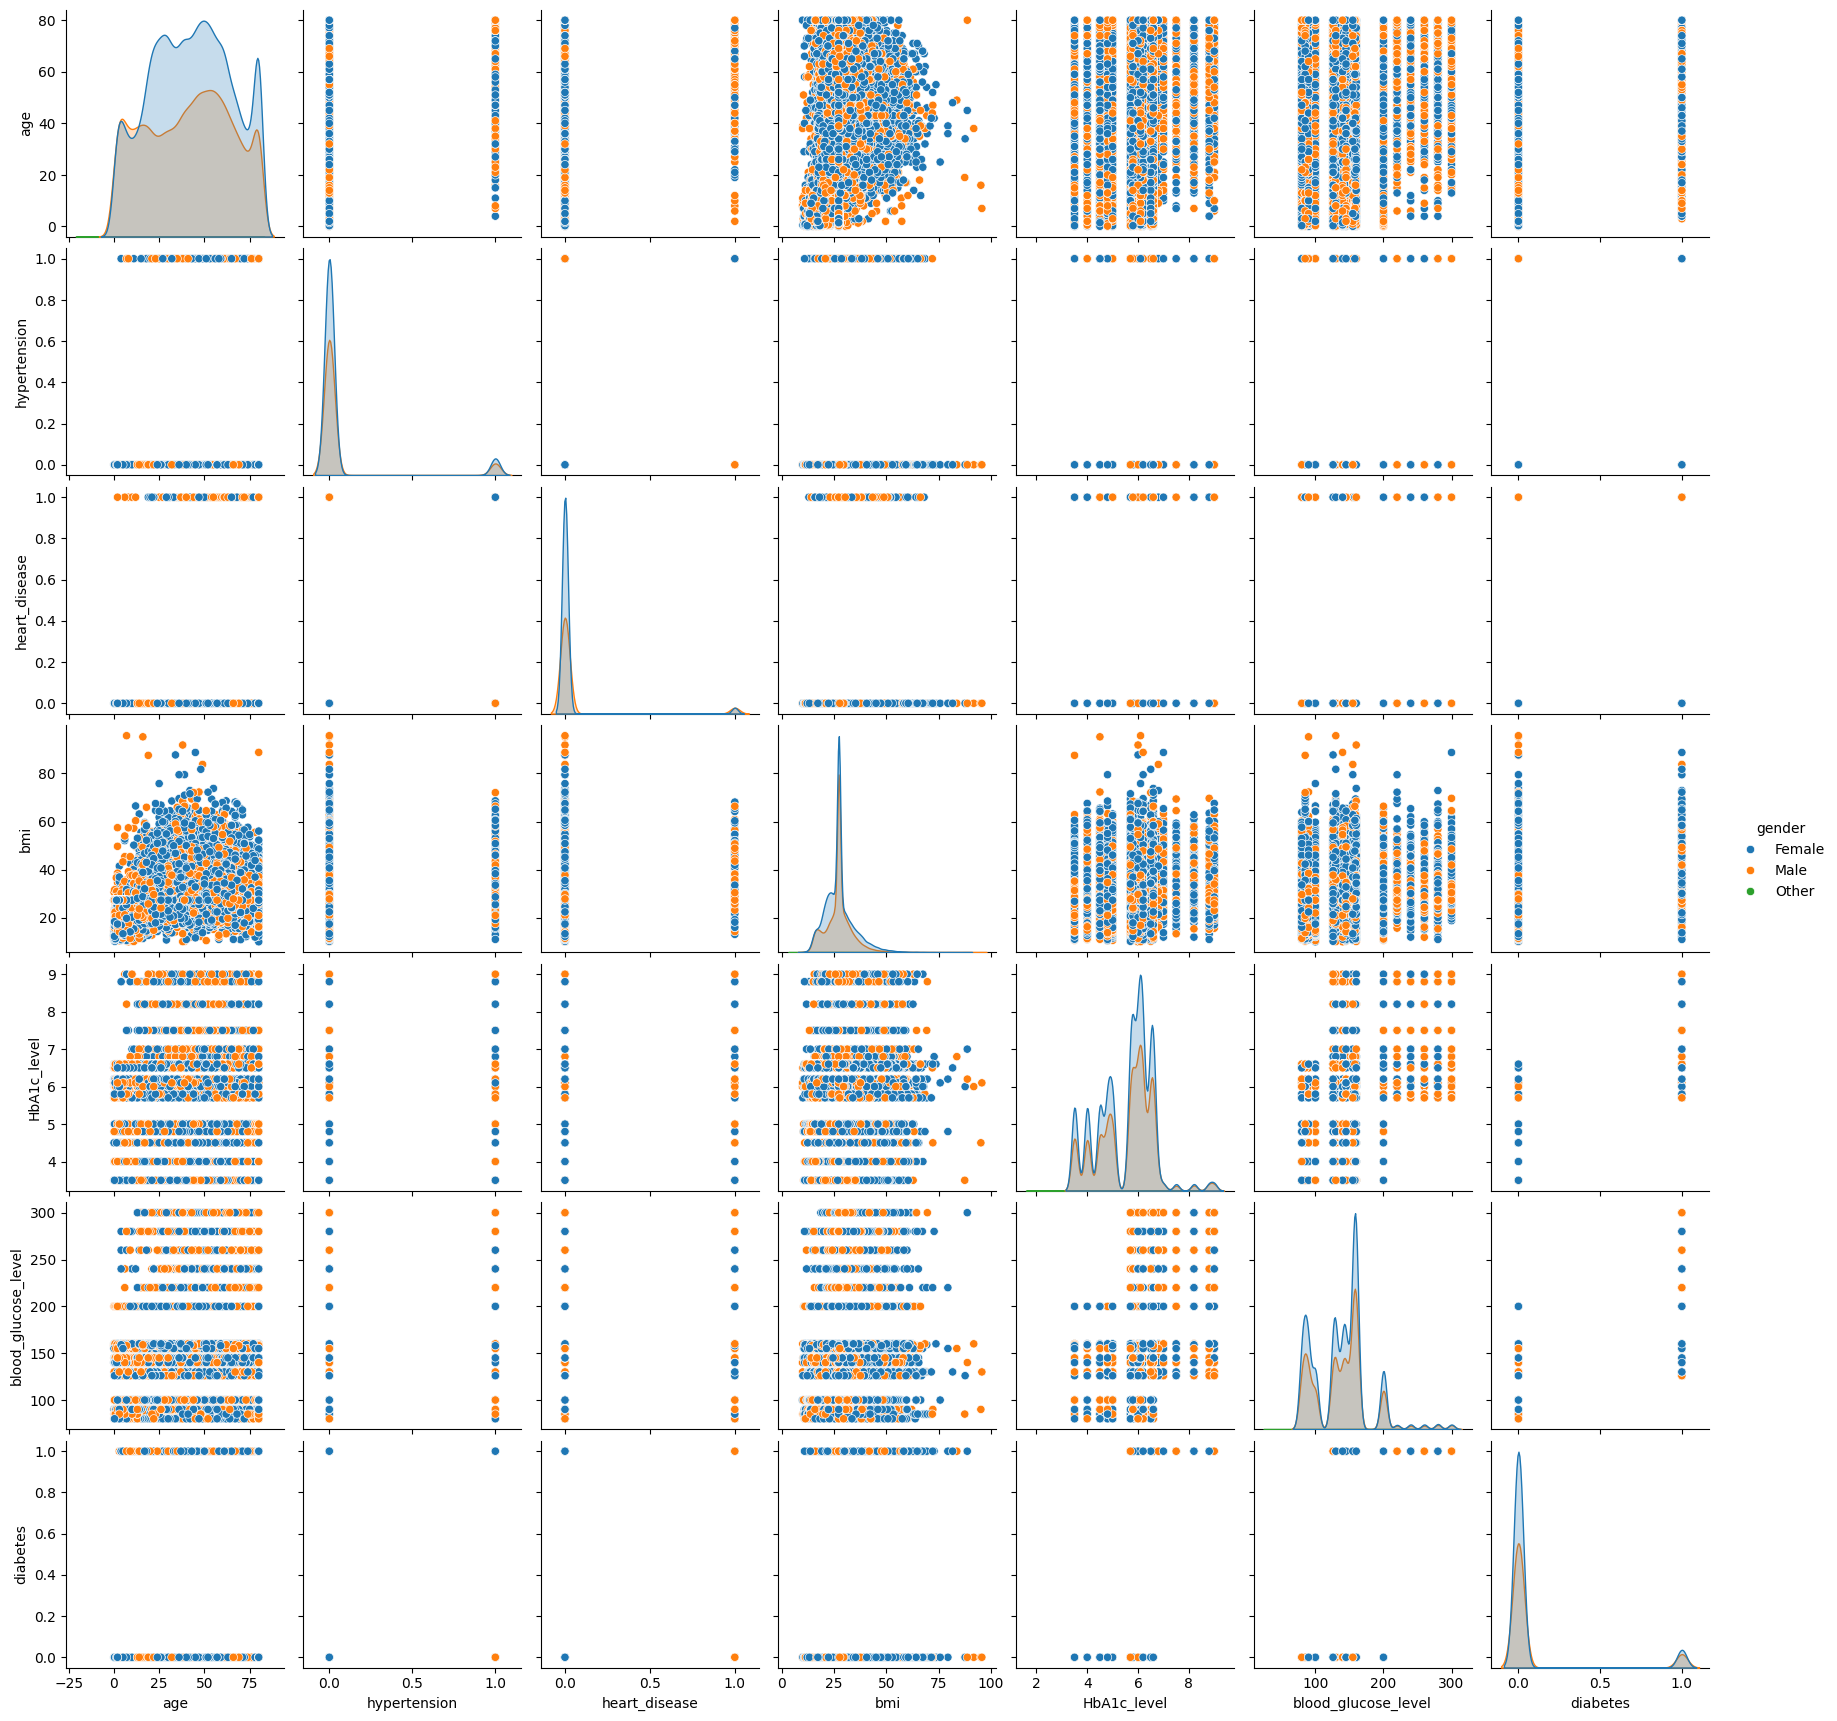

In [75]:
sns.pairplot(df, hue = 'gender')
plt.show()